## Thermal camera: from the raw data to an image

Start a virtual Python environment and run this notebook.

In [ ]:
! pip install numpy opencv-python

In [1]:
import numpy as np
import cv2
from IPython.display import Image, display

The raw data from the themal camera is an array got with `adafruit_mlx90640.MLX90640().getFrame()`. Here we emulate it with the Gaussian distribution.

In [2]:
# Generate a "fake" raw thermal data

MEAN = 20       # in degrees Celsius
STD_DEV = 0.1   # in degrees Celsius
THERMAL_FRAME_SHAPE = 24 * 32

# Only keep 1 decimal place for to emulate the temperature sensor
emu_thermal_data = np.around(
    np.random.normal(loc=MEAN, scale=STD_DEV, size=THERMAL_FRAME_SHAPE),
    decimals=1
)

The second step is to turn the 1-D Numpy array with Celsius degree numbers to a colorful image.

For an image, each pixcel is an integeter range from 0 to 255 (of `unit8` datatype). We need to scale the raw data to this range and match the datatype.

In [3]:
# Helper function to rescale the data to 8-bit for display puposes; also flip the data.
def get_rescale_data(raw_data, min_val, max_val):
    if max_val <= min_val:
        raise ValueError("max_val should be greater than min_val")
        exit(1)
    
    clipped_data = np.clip(raw_data, min_val, max_val) 
    scaled_data = np.uint8((clipped_data - min_val) / (max_val - min_val) * 255).reshape(24, 32)
    flipped_data = cv2.flip(scaled_data, 1)    # Flip on the low resolution data
    return flipped_data

The flipped data is of a low resolution 32x24. For see it clearly on our screen, we need a higher resolution. Let's say 640x480. We use the `cv2` package for the resize and interpolation.

In [4]:
def display_image(f, jpg_name="thermal_image.jpg"):
    resized_frame = cv2.resize(f, (640, 480), interpolation=cv2.INTER_CUBIC)
    image = cv2.applyColorMap(resized_frame, cv2.COLORMAP_JET)

    cv2.imwrite(jpg_name, image)

    # Display the image in Jupyter Notebook
    display(Image(filename=jpg_name))

How we map our raw data to the scaled `uint8` array matters.
For the same raw data, first we use the relative min & max values as the baseline; and then we use 10 & 65 as the baseline. The visualization is quite different.

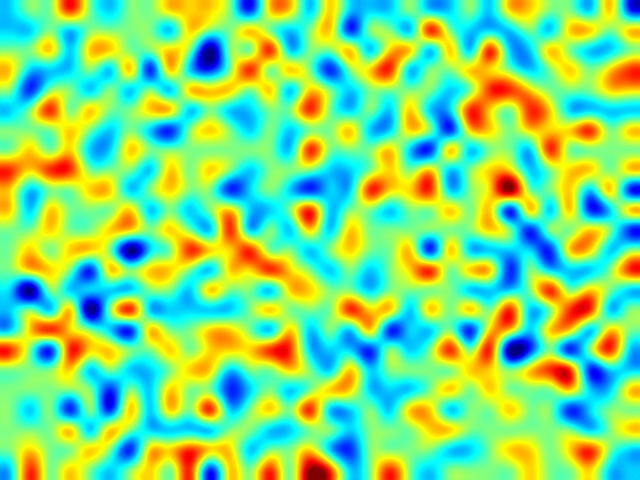

In [5]:
display_image(get_rescale_data(emu_thermal_data,
                               np.min(emu_thermal_data), np.max(emu_thermal_data)),
                               'thermal_relative.jpg') 

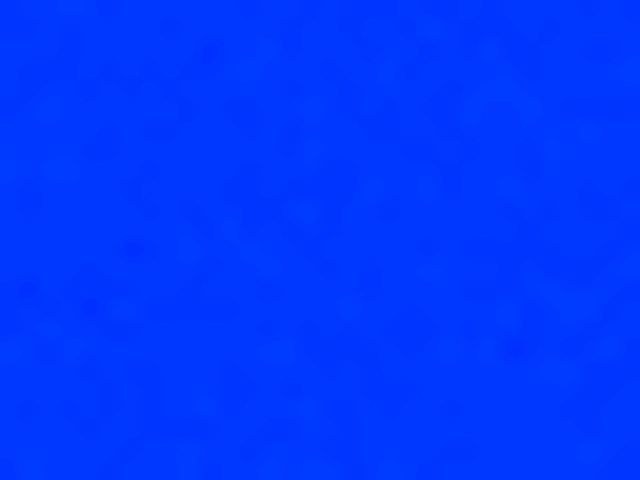

In [7]:
display_image(get_rescale_data(emu_thermal_data,
                               10, 65), 'thermal_absolute.jpg')

Now let's look at some other raw data patterns.

1. The raw temperature array has large temperature range.
2. The raw array has a checkerboad pattern.

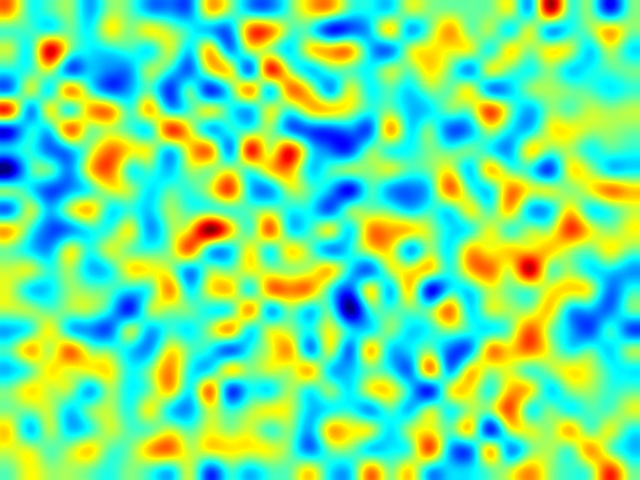

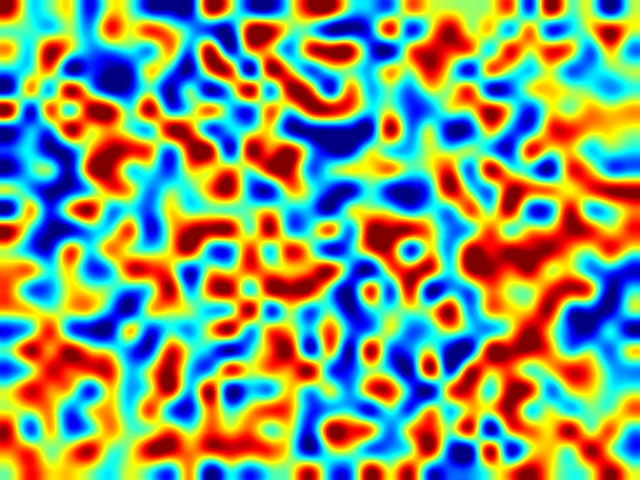

In [9]:
# Temperature array of large temperature range

emu_thermal_data = np.around(
    np.random.normal(loc=40, scale=20, size=THERMAL_FRAME_SHAPE),
    decimals=1
)

display_image(get_rescale_data(emu_thermal_data,
                               np.min(emu_thermal_data), np.max(emu_thermal_data)),
                               'thermal_relative_large_range.jpg') 
display_image(get_rescale_data(emu_thermal_data,
                               10, 65), 'thermal_absolute_large_range.jpg')

First 5x4 section of the checkerboard:
[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]]


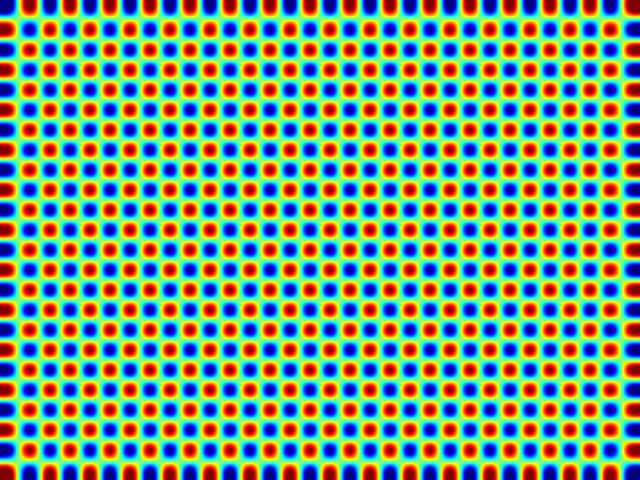

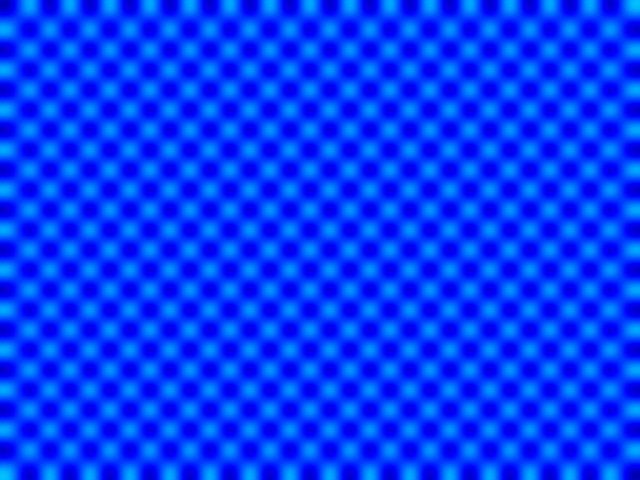

In [15]:
# The raw data has a checkerboard pattern
rows, cols = 24, 32
checkerboard = np.indices((rows, cols)).sum(axis=0) % 2
print("First 5x4 section of the checkerboard:")
print(checkerboard[:3, :4])

# Map the checkerboard pattern to the thermal data: 0 is 15 degrees Celsius, 1 is 25 degrees Celsius
emu_thermal_data = np.where(checkerboard, 15, 25).flatten()

display_image(get_rescale_data(emu_thermal_data,
                               np.min(emu_thermal_data), np.max(emu_thermal_data)),
                               'thermal_relative_chekerboard.jpg') 
display_image(get_rescale_data(emu_thermal_data,
                               10, 65), 'thermal_absolute_checkerboard.jpg')